Practical Example <br>
Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Loading the raw data

In [2]:
raw_data = pd.read_csv ('1.04. Real-life example.csv')

In [3]:
raw_data.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Our assumptions: <br>
Brand -- BWM usually more expensive <br>
Mileage -- The more the cheaper is the car <br>
Engine -- sports car - larger | economy - smaler <br>
Year - the older the car the cheaper except for vintage

Preprocessing

Exploring the descriptive statistics of the variable

In [4]:
# raw_data.describe()
# by default shows information only on numerical variables
# to se all:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


 Count - each variable is different - ! there might be some missing values <br>
 312 unique models --> more than 300 dummies --> hard to implement <br>
 top category "Yes" has 3947 entries (almost all) --> might be not very usefull <br>
 --> We are dropping "Model". information could be engineered from "Brand", "year" and "Engine".We are not loosing much variability

Determining the variable of interests

In [5]:
data = raw_data.drop(['Model'],axis=1)
# axis 0 = raws
# axis 1 = columns

In [6]:
data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003


Judging by the <b>total number of observations</b>, <b> Brand</b> <b>Body</b> <b>Milieage</b> <b>Engine Type</b> <b>registration</b> <b>Year</b> hae no missing values.

In [7]:
# To check for missing values: 
# data.isnull()
# True - Missing value | 1
# False - inaccessable value | 0
# So we may:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

<b> Rule of thumb </b> <br>
If less than 5% of the observations is removed - we are free to just remove all that have Missing Values

In [8]:
data_no_mv = data.dropna(axis=0)

In [9]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Exploring the PDF's

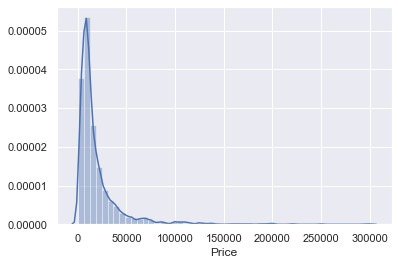

In [10]:
sns.distplot(data_no_mv['Price'])

To deal with High outlier, we can remove 1% of top variables

Dealing with outliers

Through Quantiles

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


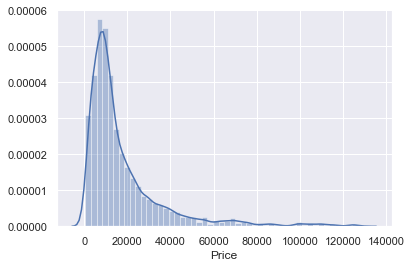

In [12]:
sns.distplot(data_1['Price'])

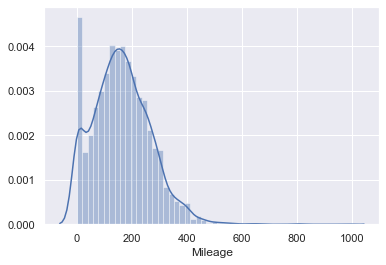

In [13]:
sns.distplot(data_no_mv['Mileage'])

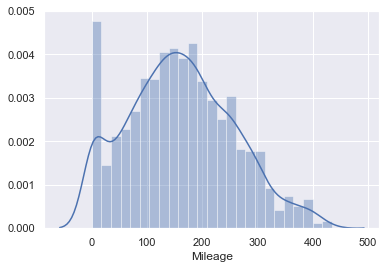

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.distplot(data_2['Mileage'])

For engine entry there are a lot of 75 / 99.99 values. As we googled, we found out that ususally Engine volume falls under 1 - 6.5. <br> 
In the old times, missing values were changed to 99.99 for computation reasosn <br> 

In [15]:
data_3 = data_2[data_2['EngineV']<6.5]

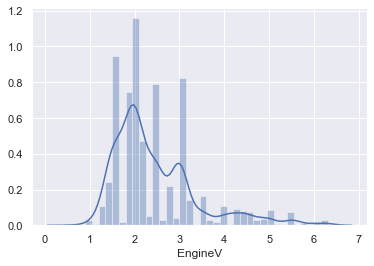

In [16]:
sns.distplot(data_3['EngineV'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

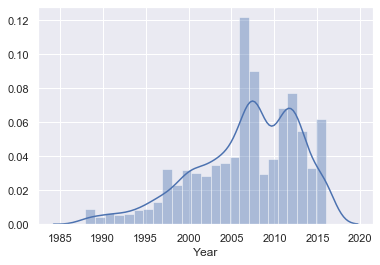

In [18]:
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Checking OLS assumptions

Text(0.5, 1.0, 'Price and Mileage')

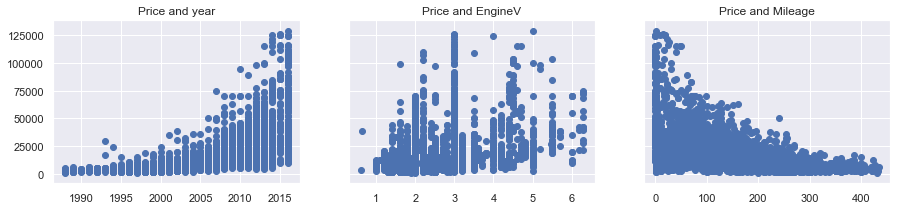

In [21]:
f,(ax1, ax2,ax3) = plt.subplots(1,3, sharey=True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

In [22]:
# There are patternt but defenitely not linear
# We can take Logarithm in price and see how it will change plot:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

Text(0.5, 1.0, 'Log Price and Mileage')

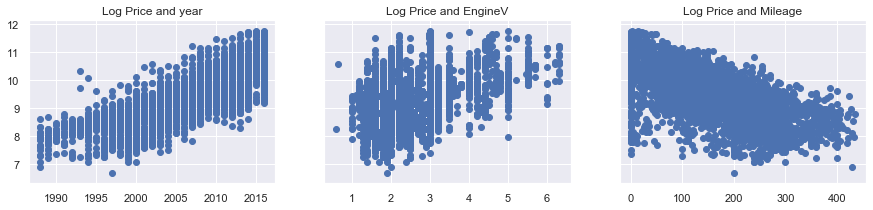

In [23]:
f,(ax1, ax2,ax3) = plt.subplots(1,3, sharey=True,figsize = (15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

In [24]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

Multicolliniary

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [26]:
#Best to check through VIF (Variance Inflation Factor) using Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif ["VIF"] = [ variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif ["features"] = variables.columns

In [27]:
vif
#when vif is 1 = no multicollinearity at all
# 1 < VIF <5 : considered perfectly OK
# 5 | 6 | 10 < VIF: unacceptable (there are different instances)

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [28]:
data_no_multicillinearity = data_cleaned.drop(['Year'], axis=1)
data_no_multicillinearity.head(1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.34284


## Create Dummy Variables

Many Dummies simultaniousely

In [29]:
# if we have N categories for a feature, we have to create N-1 dummies
data_with_dummies = pd.get_dummies(data_no_multicillinearity, drop_first=True)

In [30]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']]
vif2 = pd.DataFrame()
vif2 ["VIF"] = [ variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif2 ["features"] = variables.columns
vif2

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


### Rearrange a bit

In [32]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
cols =['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_preprocessed = data_with_dummies[cols]

In [35]:
data_preprocessed.head(3)

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


### Linear Regression

<h4> Declare the inputs and the targets

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)



<h4> Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
inputs_scaled = scaler.transform(inputs)

<h4> Training Test Split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=365)

<h4> Create the regression

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_hat = reg.predict(x_train)

<function matplotlib.pyplot.show(*args, **kw)>

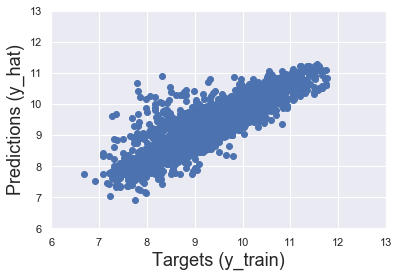

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

Text(0.5, 1.0, 'Residual PDF')

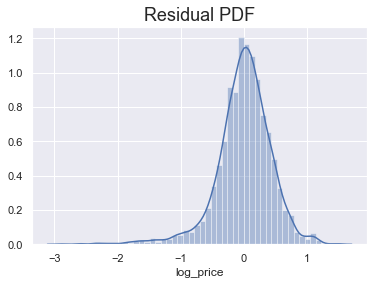

In [43]:
# Residual = Difference beteen the targets and the preditions
sns.distplot (y_train - y_hat)
plt.title('Residual PDF',size = 18)

In [44]:
reg.score(x_train,y_train)

0.744996578792662

<h4>Finding the weights and bias

In [45]:
reg.intercept_

9.415239458021299

In [46]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


Brand which is NOT here is the Benchmark. Relevant to the banchmark, other Brands (dummies) are more or less expensive

In [48]:
# Looking for a Benchmark:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

There is no "Crossover" in reg_summary so it is the enchmark

In [49]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

Diesel

## Testing

In [50]:
y_hat_test = reg.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

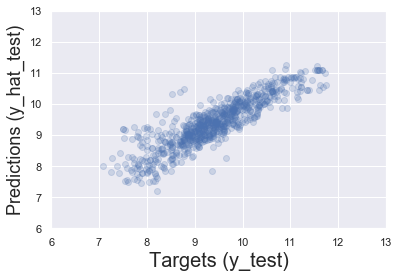

In [51]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=20)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

In [52]:
df_pf= pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf.head()

,Predictions
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


In [53]:
# exponential is the oposit for log, so to "turn prices back" we:
df_pf_natural = np.exp(df_pf)
df_pf_natural.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [54]:
y_test=y_test.reset_index(drop=True)
df_pf_natural['Target'] = np.exp (y_test)
df_pf_natural.head()

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


In [55]:
df_pf_natural['Residual'] = df_pf_natural['Target'] - df_pf_natural['Predictions']

In [56]:
df_pf_natural.head()
# examining residuals = eximining the heart of the algorithm

,Predictions,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075


In [57]:
df_pf_natural['Difference%'] = np.absolute(df_pf_natural['Residual'] / df_pf_natural['Target']*100)

In [58]:
df_pf_natural.head()

,Predictions,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859


In [59]:
df_pf_natural.describe()

,Predictions,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [60]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:'%.2f' %x)
df_pf_natural.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


The predictions are higher than the targets <br> 
because the where Difference is <b>High</b> the residual is <b> negative </b>

How to imrove our model: <br>
1. Use a different set of variables <br>
2. Remove a bigger part of the putliers <br>
3. Use different kinds of transformation <br>
